In [2]:
#using Pkg
# Pkg.add("CSV")
using CSV
using PyPlot
using JuMP, Gurobi

In [68]:
soil =  CSV.read("26wc.csv");

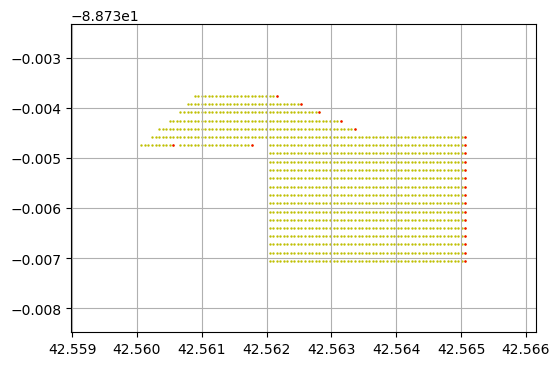

56 112 168 224 280 336 392 448 504 560 616 672 728 784 794 815 871 960 1016 1065 1105 1138 

In [81]:
#onbtain all data
(num,q)=size(soil)
y = soil[1:num,2]
x = soil[1:num,3]
#Find Edge points
SET1 = Vector{Float64}()
append!(SET1, 0)
for i in 1:(num-1)
    if  x[i+1]-x[i] > 10^-4
        print(i," ");
        append!(SET1, i)     
    elseif  x[i+1]-x[i] <0
         print(i," ");
        append!(SET1, i)
    end
end
append!(SET1, num)
#locate edge points on map
x_set = []
y_set = []
for i in 2:length(SET1)
    append!(x_set, x[Int(SET1[i])])
    append!(y_set, y[Int(SET1[i])])
end
num_set = length(x_set)
figure(figsize=(6, 4))
scatter(x,y,0.5,"y")
scatter(x_set,y_set,0.5,"r")
grid()
SET1;


# start:num

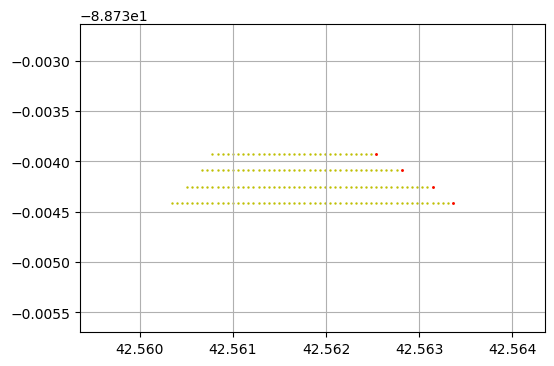

56 105 145 

In [76]:
#plit data
start = 1 + 960
num = 1138
y = soil[start:num,2]
x = soil[start:num,3]

#define variables
type11= soil[start:num,4]
type22= soil[start:num,5]
type33= soil[start:num,6]
type44= soil[start:num,7]
type55= soil[start:num,8]
type66= soil[start:num,9]


#normalization - this ensures all values lie in range [0,1]
dev =num - start
type1 = (type11.-sum(type11)/dev)./(maximum(type11)-minimum(type11))
type2 = (type22.-sum(type22)/dev)./(maximum(type22)-minimum(type22));
type3 = (type33.-sum(type33)/dev)./(maximum(type33)-minimum(type33));
type4 = (type44.-sum(type44)/dev)./(maximum(type44)-minimum(type44));
type5 = (type55.-sum(type55)/dev)./(maximum(type55)-minimum(type55));
type6 = (type66.-sum(type66)/dev)./(maximum(type66)-minimum(type66));

#Find Edge points
SET = Vector{Float64}()
append!(SET, 0)
for i in 1:(num-1)-start
    if  x[i+1]-x[i] > 10^-4
        print(i," ");
        append!(SET, i)     
    elseif  x[i+1]-x[i] <0
         print(i," ");
        append!(SET, i)
    end
end
append!(SET, num-start+1)

#locate edge points on map
x_set = []
y_set = []
for i in 2:length(SET)
    append!(x_set, x[Int(SET[i])])
    append!(y_set, y[Int(SET[i])])
end
num_set = length(x_set)
figure(figsize=(6, 4))
scatter(x,y,0.5,"y")
scatter(x_set,y_set,1,"r")
grid()
SET;


Academic license - for non-commercial use only
  0.000029 seconds (24 allocations: 1.438 KiB)


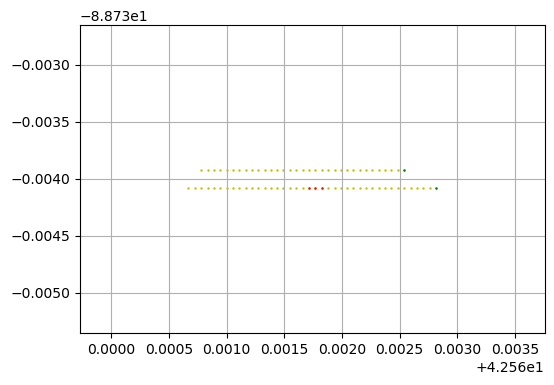

Academic license - for non-commercial use only
Gurobi Optimizer version 9.0.1 build v9.0.1rc0 (win64)
Optimize a model with 1378 rows, 770 columns and 5590 nonzeros
Model fingerprint: 0xf77ba056
Variable types: 257 continuous, 513 integer (513 binary)
Coefficient statistics:
  Matrix range     [1e-03, 1e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+03]
Presolve removed 1278 rows and 735 columns
Presolve time: 0.04s
Presolved: 100 rows, 35 columns, 681 nonzeros
Variable types: 20 continuous, 15 integer (15 binary)
Found heuristic solution: objective -0.3671525
Found heuristic solution: objective -0.4279421

Root relaxation: objective -4.782102e-01, 38 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0      -0.4782102   -0.47821  0.00%     -    0s

Explored 0 nodes (38 simplex it

In [98]:
#### one set - 9 objective 

#Select number of points
n_selected = 3  # total number of the points will be selected.
lambda = 10^-3  # regularization parameter


####################################################################################################
Ls = Model(with_optimizer(Gurobi.Optimizer, NonConvex = 2))
@variable(Ls, point[1:n_selected,1:num-start+1], Bin)    # binary point_i_j shows if the point i will choose the plot j.
@constraint(Ls,c1,sum(point) == n_selected)      # only 10 points will be chosen.
@constraint(Ls, c2[i = 1:n_selected] , sum(point[i,:]) == 1 )   # each point must choose only one points
#################################################################################################


#################################################################################################
##L_inf regularization    #We want maximun the range of the selected point value and apply L_inf regularization 
#                            to minimize the norm of the difference.
# #first variable
# @variable(Ls,p_value_1[1:n_selected])           # pvalue_i is the value(property) of the point i 
# @constraint(Ls, c41[i = 1:n_selected] , p_value_1[i] == sum(type1'*point[i,:]) ) 
# @constraint(Ls, c51[i = 1:n_selected-1], p_value_1[i] >= p_value_1[i+1])         # p_value is in order from large to small

# @variable(Ls, diff_1[1:n_selected-1])          # diff_i is the difference between the pvalue_i and pvalue_i+1
# @constraint(Ls, c61[i = 1:n_selected-1], diff_1[i]==(p_value_1[i]-p_value_1[i+1]))

# @variable(Ls, max_diff_1)                       # max_diff is the maximun of the difference
# @constraint(Ls, c71[i = 1:n_selected-1], max_diff_1 >= diff_1[i] )        

#second variable
@variable(Ls,p_value_2[1:n_selected])           # pvalue_i is the value(property) of the point i 
@constraint(Ls, c42[i = 1:n_selected] , p_value_2[i] == sum(type2'*point[i,:]) ) 
@constraint(Ls, c52[i = 1:n_selected-1], p_value_2[i] >= p_value_2[i+1])         # p_value is in order from large to small

@variable(Ls, diff_2[1:n_selected-1])          # diff_i is the difference between the pvalue_i and pvalue_i+1
@constraint(Ls, c62[i = 1:n_selected-1], diff_2[i]==(p_value_2[i]-p_value_2[i+1]))

@variable(Ls, max_diff_2)                       # max_diff is the maximun of the difference
@constraint(Ls, c72[i = 1:n_selected-1], max_diff_2 >= diff_2[i] )   

#third variable
@variable(Ls,p_value_3[1:n_selected])           # pvalue_i is the value(property) of the point i 
@constraint(Ls, c43[i = 1:n_selected] , p_value_3[i] == sum(type3'*point[i,:]) ) 
@constraint(Ls, c53[i = 1:n_selected-1], p_value_3[i] >= p_value_3[i+1])         # p_value is in order from large to small

@variable(Ls, diff_3[1:n_selected-1])          # diff_i is the difference between the pvalue_i and pvalue_i+1
@constraint(Ls, c63[i = 1:n_selected-1], diff_3[i]==(p_value_3[i]-p_value_3[i+1]))

@variable(Ls, max_diff_3)                       # max_diff is the maximun of the difference
@constraint(Ls, c73[i = 1:n_selected-1], max_diff_3 >= diff_3[i] )   

#fourth variable
@variable(Ls,p_value_4[1:n_selected])           # pvalue_i is the value(property) of the point i 
@constraint(Ls, c44[i = 1:n_selected] , p_value_4[i] == sum(type4'*point[i,:]) ) 
@constraint(Ls, c54[i = 1:n_selected-1], p_value_4[i] >= p_value_4[i+1])         # p_value is in order from large to small

@variable(Ls, diff_4[1:n_selected-1])          # diff_i is the difference between the pvalue_i and pvalue_i+1
@constraint(Ls, c64[i = 1:n_selected-1], diff_4[i]==(p_value_4[i]-p_value_4[i+1]))

@variable(Ls, max_diff_4)                       # max_diff is the maximun of the difference
@constraint(Ls, c74[i = 1:n_selected-1], max_diff_4 >= diff_4[i] )   
#fifth variable
@variable(Ls,p_value_5[1:n_selected])           # pvalue_i is the value(property) of the point i 
@constraint(Ls, c45[i = 1:n_selected] , p_value_5[i] == sum(type5'*point[i,:]) ) 
@constraint(Ls, c55[i = 1:n_selected-1], p_value_5[i] >= p_value_5[i+1])         # p_value is in order from large to small

@variable(Ls, diff_5[1:n_selected-1])          # diff_i is the difference between the pvalue_i and pvalue_i+1
@constraint(Ls, c65[i = 1:n_selected-1], diff_5[i]==(p_value_5[i]-p_value_5[i+1]))

@variable(Ls, max_diff_5)                       # max_diff is the maximun of the difference
@constraint(Ls, c75[i = 1:n_selected-1], max_diff_5 >= diff_5[i] )   
#sixth variable
@variable(Ls,p_value_6[1:n_selected])           # pvalue_i is the value(property) of the point i 
@constraint(Ls, c46[i = 1:n_selected] , p_value_6[i] == sum(type6'*point[i,:]) ) 
@constraint(Ls, c56[i = 1:n_selected-1], p_value_6[i] >= p_value_6[i+1])         # p_value is in order from large to small

@variable(Ls, diff_6[1:n_selected-1])          # diff_i is the difference between the pvalue_i and pvalue_i+1
@constraint(Ls, c66[i = 1:n_selected-1], diff_6[i]==(p_value_6[i]-p_value_6[i+1]))

@variable(Ls, max_diff_6)                       # max_diff is the maximun of the difference
@constraint(Ls, c76[i = 1:n_selected-1], max_diff_6 >= diff_6[i] )   
  

#################################################################################################


#################################################################################################
###set constraint     #the seleceted points must be on th same line.
@variable(Ls, set[1:num_set],Bin)     # there is num_set segments(lines) in the plots, and binary set shows if the set is selected. 
@constraint(Ls,c8,sum(set)==1)   # all the points must locate in the same set.
# set_j equals to 1 if at least one of the points in the set_j.
@constraint(Ls,c9[j=1:num_set],n_selected*set[j]>=sum(sum(point[1:n_selected,(Int(SET[j]+1)):(Int(SET[j+1]))]))) 
                               
#################################################################################################


#################################################################################################
###neighbor constraint   #We hope to select ten (n_selected) consecutive points
@variable(Ls, p_index[1:n_selected])        # p_index_i shows the index of the selected points 
                                            #(not with the same order of point_i)
@variable(Ls, y1[1:num-start+1],Bin)                # logical relation binary y1 shows if plot_j is selected 
@variable(Ls, y2[1:n_selected,1:num-start+1],Bin)   # logical relation binary y2 shows if point_i match with the plot_j

@constraint(Ls, cx1, sum(y1) == n_selected )                    # only 10 index equal to 1 (only 10 plots are selected)
@constraint(Ls, cx2[j=1:num-start+1], y1[j] == sum(y2[:,j]))            # if y1_j is 1, then sum_i(y2_i_j) is 1.
@constraint(Ls, cx3[i=1:n_selected], sum(y2[i,1:num-start+1]) == 1)     # each point must choose only one points
@constraint(Ls, cx4[j=1:num-start+1], sum(y2[:,j]) <= 1)                # each plots can only match at most 1 point.
@constraint(Ls, c11[j=1:num-start+1], sum(point[:,j]) == y1[j])  # logical relation shows if plot_j is not selected, y_j return 0.
#################################################################################################



#################################################################################################
#McCormick relaxation @constraint(Ls, c10[i=1:n_selected,j=1:num],(y2[i,j])*(p_index[i] - j) == 0 ) #if point_i_j located in plot_j, pindex_i equal to j.  
#w[i,j]=y2[i,j]*p_index[i]
@variable(Ls, 0<= w[i=1:n_selected,j=1:num-start+1])
@constraint(Ls, r2[i=1:n_selected,j=1:num-start+1],w[i,j]-j*y2[i,j] == 0)
@constraint(Ls, r3[i=1:n_selected,j=1:num-start+1],w[i,j] >= y2[i,j])
@constraint(Ls, r4[i=1:n_selected,j=1:num-start+1],w[i,j] >= p_index[i] + num*y2[i,j] -num)
@constraint(Ls, r5[i=1:n_selected,j=1:num-start+1],w[i,j] <= p_index[i] + y2[i,j] - 1)
@constraint(Ls, r6[i=1:n_selected,j=1:num-start+1],w[i,j] <= num*y2[i,j])

@constraint(Ls, c13[i=1:n_selected-1], p_index[i] <= p_index[i+1]-1)   # pindex is in order from large to small
@constraint(Ls, c14,p_index[n_selected] -p_index[1] <= n_selected-1)   # index_max - index_min equals to 9

#if you want more than 1 set
# @constraint(Ls, c141,p_index[Int(n_selected/3)] -p_index[1] == n_selected/3-1)   # index_max - index_min equals to 9
# @constraint(Ls, c142,p_index[Int(n_selected/3*2)] -p_index[Int(n_selected/3+1)] == n_selected/3-1)   # index_max - index_min equals to 9
# @constraint(Ls, c143,p_index[n_selected] -p_index[Int(n_selected/3*2+1)] == n_selected/3-1)   # index_max - index_min equals to 9

#################################################################################################

# @variable(Ls, obj1)
# @constraint(Ls, objective1, obj1 == (p_value_1[n_selected]-p_value_1[1])+lambda*(max_diff_1))

@variable(Ls, obj2)
@constraint(Ls, objective2, obj2 == (p_value_2[n_selected]-p_value_2[1])+lambda*(max_diff_2))

@variable(Ls, obj3)
@constraint(Ls, objective3, obj3 == (p_value_3[n_selected]-p_value_3[1])+lambda*(max_diff_3))

@variable(Ls, obj4)
@constraint(Ls, objective4, obj4 == (p_value_4[n_selected]-p_value_4[1])+lambda*(max_diff_4))

@variable(Ls, obj5)
@constraint(Ls, objective5, obj5 == (p_value_5[n_selected]-p_value_5[1])+lambda*(max_diff_5))

@variable(Ls, obj6)
@constraint(Ls, objective6, obj6 == (p_value_6[n_selected]-p_value_6[1])+lambda*(max_diff_6))

# @variable(Ls, obj7)
# @constraint(Ls, objective7, obj7 == (p_value_7[n_selected]-p_value_7[1])+lambda*(max_diff_7))


#weights for each objective if apply
# a1= 1.1
#maximun the range of the selected point value(p1-p10) and apply L_inf regularization to minimize the norm of the difference.
@time @objective(Ls, Min,  obj2 + obj3 + obj4 + obj5 + obj6 ) #+ obj7 + obj8 +obj9
optimize!(Ls)

# soil_val = []
yield = []
K = []
P = []
pH = []
elevation = []



for i in 1:n_selected
#     soilv=floor(value.(p_value_1[i]*((maximum(type11)-minimum(type11)))+sum(type11)/dev))
#     append!(soil_val,soilv)
    yied1v=value.(p_value_2[i]*((maximum(type22)-minimum(type22)))+sum(type22)/dev)
    append!(yield,yied1v)
    Kv=value.(p_value_3[i]*((maximum(type33)-minimum(type33)))+sum(type33)/dev)
    append!(K,Kv)
    P1v=value.(p_value_4[i]*((maximum(type44)-minimum(type44)))+sum(type44)/dev)
    append!(P,P1v)
    pHv=value.(p_value_5[i]*((maximum(type55)-minimum(type55)))+sum(type55)/dev)
    append!(pH,pHv)
    elev=value.(p_value_6[i]*((maximum(type66)-minimum(type66)))+sum(type66)/dev)
    append!(elevation,elev)
end


p_set = []
z_set = []
for j in 1:num-start+1
for i in 1:n_selected
    if JuMP.value(point[i,j])> 0
#  "  Soil Type: ",soil_val[i],
        println("point ",i," ID: " ,j+start,  "  Yield: ",yield[i], "  K: ",K[i], 
                "  P1: ",P[i], "  pH: ",pH[i], "  Elevation: ",elevation[i])
        append!(p_set, x[j])
        append!(z_set, y[j])
    end
end
end

figure(figsize=(6, 4))
scatter(x,y,0.5,"y")
scatter(p_set,z_set,0.5,"r")
scatter(x_set,y_set,0.5,"g")
grid()

# with soil type

In [83]:
println(SET1)

[0.0, 56.0, 112.0, 168.0, 224.0, 280.0, 336.0, 392.0, 448.0, 504.0, 560.0, 616.0, 672.0, 728.0, 784.0, 794.0, 815.0, 871.0, 960.0, 1016.0, 1065.0, 1105.0, 1138.0, 1162.0]


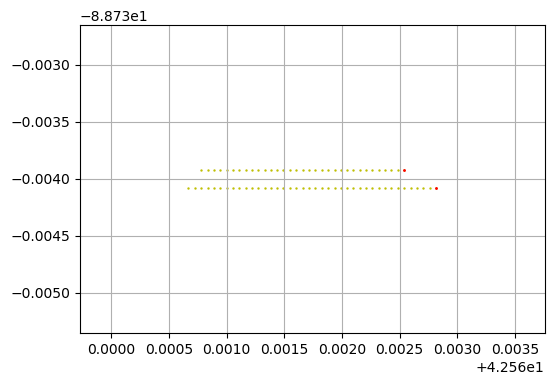

40 

In [86]:
#plit data
start = 1 + 1065
num = 1138
y = soil[start:num,2]
x = soil[start:num,3]

#define variables
type11= soil[start:num,4]
type22= soil[start:num,5]
type33= soil[start:num,6]
type44= soil[start:num,7]
type55= soil[start:num,8]
type66= soil[start:num,9]


#normalization - this ensures all values lie in range [0,1]
dev =num - start
type1 = (type11.-sum(type11)/dev)./(maximum(type11)-minimum(type11))
type2 = (type22.-sum(type22)/dev)./(maximum(type22)-minimum(type22));
type3 = (type33.-sum(type33)/dev)./(maximum(type33)-minimum(type33));
type4 = (type44.-sum(type44)/dev)./(maximum(type44)-minimum(type44));
type5 = (type55.-sum(type55)/dev)./(maximum(type55)-minimum(type55));
type6 = (type66.-sum(type66)/dev)./(maximum(type66)-minimum(type66));

#Find Edge points
SET = Vector{Float64}()
append!(SET, 0)
for i in 1:(num-1)-start
    if  x[i+1]-x[i] > 10^-4
        print(i," ");
        append!(SET, i)     
    elseif  x[i+1]-x[i] <0
         print(i," ");
        append!(SET, i)
    end
end
append!(SET, num-start+1)

#locate edge points on map
x_set = []
y_set = []
for i in 2:length(SET)
    append!(x_set, x[Int(SET[i])])
    append!(y_set, y[Int(SET[i])])
end
num_set = length(x_set)
figure(figsize=(6, 4))
scatter(x,y,0.5,"y")
scatter(x_set,y_set,1,"r")
grid()
SET;


Academic license - for non-commercial use only
  0.000033 seconds (24 allocations: 1.469 KiB)
Academic license - for non-commercial use only
Gurobi Optimizer version 9.0.1 build v9.0.1rc0 (win64)
Optimize a model with 2172 rows, 1241 columns and 9580 nonzeros
Model fingerprint: 0xd236ca2a
Variable types: 436 continuous, 805 integer (805 binary)
Coefficient statistics:
  Matrix range     [1e-03, 1e+03]
  Objective range  [1e-01, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+03]
Presolve removed 2172 rows and 1241 columns
Presolve time: 0.08s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.09 seconds
Thread count was 1 (of 4 available processors)

Solution count 1: -0.0434955 

Optimal solution found (tolerance 1.00e-04)
Best objective -4.349545989572e-02, best bound -4.349545989572e-02, gap 0.0000%
point 5 ID: 1076  Soil Type: 3.0  Yield: 10720.002999999997  K: 115.20869999999996  P1: 22.685799999999983  pH: 5.793899999999999

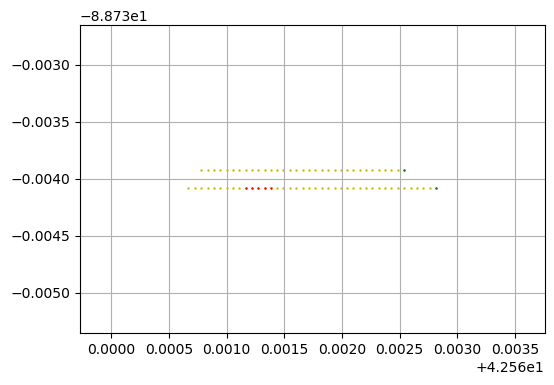

11606.154169999987  K: 115.20869999999996  P1: 22.685799999999993  pH: 5.7939  Elevation: 926.0422166999998


In [97]:
#### one set - 9 objective 

#Select number of points
n_selected = 5  # total number of the points will be selected.
lambda = 10^-3  # regularization parameter


####################################################################################################
Ls = Model(with_optimizer(Gurobi.Optimizer, NonConvex = 2))
@variable(Ls, point[1:n_selected,1:num-start+1], Bin)    # binary point_i_j shows if the point i will choose the plot j.
@constraint(Ls,c1,sum(point) == n_selected)      # only 10 points will be chosen.
@constraint(Ls, c2[i = 1:n_selected] , sum(point[i,:]) == 1 )   # each point must choose only one points
#################################################################################################


#################################################################################################
##L_inf regularization    #We want maximun the range of the selected point value and apply L_inf regularization 
#                            to minimize the norm of the difference.
#first variable
@variable(Ls,p_value_1[1:n_selected])           # pvalue_i is the value(property) of the point i 
@constraint(Ls, c41[i = 1:n_selected] , p_value_1[i] == sum(type1'*point[i,:]) ) 
@constraint(Ls, c51[i = 1:n_selected-1], p_value_1[i] >= p_value_1[i+1])         # p_value is in order from large to small

@variable(Ls, diff_1[1:n_selected-1])          # diff_i is the difference between the pvalue_i and pvalue_i+1
@constraint(Ls, c61[i = 1:n_selected-1], diff_1[i]==(p_value_1[i]-p_value_1[i+1]))

@variable(Ls, max_diff_1)                       # max_diff is the maximun of the difference
@constraint(Ls, c71[i = 1:n_selected-1], max_diff_1 >= diff_1[i] )        

#second variable
@variable(Ls,p_value_2[1:n_selected])           # pvalue_i is the value(property) of the point i 
@constraint(Ls, c42[i = 1:n_selected] , p_value_2[i] == sum(type2'*point[i,:]) ) 
@constraint(Ls, c52[i = 1:n_selected-1], p_value_2[i] >= p_value_2[i+1])         # p_value is in order from large to small

@variable(Ls, diff_2[1:n_selected-1])          # diff_i is the difference between the pvalue_i and pvalue_i+1
@constraint(Ls, c62[i = 1:n_selected-1], diff_2[i]==(p_value_2[i]-p_value_2[i+1]))

@variable(Ls, max_diff_2)                       # max_diff is the maximun of the difference
@constraint(Ls, c72[i = 1:n_selected-1], max_diff_2 >= diff_2[i] )   

#third variable
@variable(Ls,p_value_3[1:n_selected])           # pvalue_i is the value(property) of the point i 
@constraint(Ls, c43[i = 1:n_selected] , p_value_3[i] == sum(type3'*point[i,:]) ) 
@constraint(Ls, c53[i = 1:n_selected-1], p_value_3[i] >= p_value_3[i+1])         # p_value is in order from large to small

@variable(Ls, diff_3[1:n_selected-1])          # diff_i is the difference between the pvalue_i and pvalue_i+1
@constraint(Ls, c63[i = 1:n_selected-1], diff_3[i]==(p_value_3[i]-p_value_3[i+1]))

@variable(Ls, max_diff_3)                       # max_diff is the maximun of the difference
@constraint(Ls, c73[i = 1:n_selected-1], max_diff_3 >= diff_3[i] )   

#fourth variable
@variable(Ls,p_value_4[1:n_selected])           # pvalue_i is the value(property) of the point i 
@constraint(Ls, c44[i = 1:n_selected] , p_value_4[i] == sum(type4'*point[i,:]) ) 
@constraint(Ls, c54[i = 1:n_selected-1], p_value_4[i] >= p_value_4[i+1])         # p_value is in order from large to small

@variable(Ls, diff_4[1:n_selected-1])          # diff_i is the difference between the pvalue_i and pvalue_i+1
@constraint(Ls, c64[i = 1:n_selected-1], diff_4[i]==(p_value_4[i]-p_value_4[i+1]))

@variable(Ls, max_diff_4)                       # max_diff is the maximun of the difference
@constraint(Ls, c74[i = 1:n_selected-1], max_diff_4 >= diff_4[i] )   
#fifth variable
@variable(Ls,p_value_5[1:n_selected])           # pvalue_i is the value(property) of the point i 
@constraint(Ls, c45[i = 1:n_selected] , p_value_5[i] == sum(type5'*point[i,:]) ) 
@constraint(Ls, c55[i = 1:n_selected-1], p_value_5[i] >= p_value_5[i+1])         # p_value is in order from large to small

@variable(Ls, diff_5[1:n_selected-1])          # diff_i is the difference between the pvalue_i and pvalue_i+1
@constraint(Ls, c65[i = 1:n_selected-1], diff_5[i]==(p_value_5[i]-p_value_5[i+1]))

@variable(Ls, max_diff_5)                       # max_diff is the maximun of the difference
@constraint(Ls, c75[i = 1:n_selected-1], max_diff_5 >= diff_5[i] )   
#sixth variable
@variable(Ls,p_value_6[1:n_selected])           # pvalue_i is the value(property) of the point i 
@constraint(Ls, c46[i = 1:n_selected] , p_value_6[i] == sum(type6'*point[i,:]) ) 
@constraint(Ls, c56[i = 1:n_selected-1], p_value_6[i] >= p_value_6[i+1])         # p_value is in order from large to small

@variable(Ls, diff_6[1:n_selected-1])          # diff_i is the difference between the pvalue_i and pvalue_i+1
@constraint(Ls, c66[i = 1:n_selected-1], diff_6[i]==(p_value_6[i]-p_value_6[i+1]))

@variable(Ls, max_diff_6)                       # max_diff is the maximun of the difference
@constraint(Ls, c76[i = 1:n_selected-1], max_diff_6 >= diff_6[i] )   
  

#################################################################################################


#################################################################################################
###set constraint     #the seleceted points must be on th same line.
@variable(Ls, set[1:num_set],Bin)     # there is num_set segments(lines) in the plots, and binary set shows if the set is selected. 
@constraint(Ls,c8,sum(set)==1)   # all the points must locate in the same set.
# set_j equals to 1 if at least one of the points in the set_j.
@constraint(Ls,c9[j=1:num_set],n_selected*set[j]>=sum(sum(point[1:n_selected,(Int(SET[j]+1)):(Int(SET[j+1]))]))) 
                               
#################################################################################################


#################################################################################################
###neighbor constraint   #We hope to select ten (n_selected) consecutive points
@variable(Ls, p_index[1:n_selected])        # p_index_i shows the index of the selected points 
                                            #(not with the same order of point_i)
@variable(Ls, y1[1:num-start+1],Bin)                # logical relation binary y1 shows if plot_j is selected 
@variable(Ls, y2[1:n_selected,1:num-start+1],Bin)   # logical relation binary y2 shows if point_i match with the plot_j

@constraint(Ls, cx1, sum(y1) == n_selected )                    # only 10 index equal to 1 (only 10 plots are selected)
@constraint(Ls, cx2[j=1:num-start+1], y1[j] == sum(y2[:,j]))            # if y1_j is 1, then sum_i(y2_i_j) is 1.
@constraint(Ls, cx3[i=1:n_selected], sum(y2[i,1:num-start+1]) == 1)     # each point must choose only one points
@constraint(Ls, cx4[j=1:num-start+1], sum(y2[:,j]) <= 1)                # each plots can only match at most 1 point.
@constraint(Ls, c11[j=1:num-start+1], sum(point[:,j]) == y1[j])  # logical relation shows if plot_j is not selected, y_j return 0.
#################################################################################################



#################################################################################################
#McCormick relaxation @constraint(Ls, c10[i=1:n_selected,j=1:num],(y2[i,j])*(p_index[i] - j) == 0 ) 
#if point_i_j located in plot_j, pindex_i equal to j.  
#w[i,j]=y2[i,j]*p_index[i]
@variable(Ls, 0<= w[i=1:n_selected,j=1:num-start+1])
@constraint(Ls, r2[i=1:n_selected,j=1:num-start+1],w[i,j]-j*y2[i,j] == 0)
@constraint(Ls, r3[i=1:n_selected,j=1:num-start+1],w[i,j] >= y2[i,j])
@constraint(Ls, r4[i=1:n_selected,j=1:num-start+1],w[i,j] >= p_index[i] + num*y2[i,j] -num)
@constraint(Ls, r5[i=1:n_selected,j=1:num-start+1],w[i,j] <= p_index[i] + y2[i,j] - 1)
@constraint(Ls, r6[i=1:n_selected,j=1:num-start+1],w[i,j] <= num*y2[i,j])

@constraint(Ls, c13[i=1:n_selected-1], p_index[i] <= p_index[i+1]-1)   # pindex is in order from large to small
@constraint(Ls, c14,p_index[n_selected] -p_index[1] <= n_selected-1)   # index_max - index_min equals to 9

#if you want more than 1 set
# @constraint(Ls, c141,p_index[Int(n_selected/3)] -p_index[1] == n_selected/3-1)   # index_max - index_min equals to 9
# @constraint(Ls, c142,p_index[Int(n_selected/3*2)] -p_index[Int(n_selected/3+1)] == n_selected/3-1)   # index_max - index_min equals to 9
# @constraint(Ls, c143,p_index[n_selected] -p_index[Int(n_selected/3*2+1)] == n_selected/3-1)   # index_max - index_min equals to 9

#################################################################################################

@variable(Ls, obj1)
@constraint(Ls, objective1, obj1 == (p_value_1[n_selected]-p_value_1[1])+lambda*(max_diff_1))

@variable(Ls, obj2)
@constraint(Ls, objective2, obj2 == (p_value_2[n_selected]-p_value_2[1])+lambda*(max_diff_2))

@variable(Ls, obj3)
@constraint(Ls, objective3, obj3 == (p_value_3[n_selected]-p_value_3[1])+lambda*(max_diff_3))

@variable(Ls, obj4)
@constraint(Ls, objective4, obj4 == (p_value_4[n_selected]-p_value_4[1])+lambda*(max_diff_4))

@variable(Ls, obj5)
@constraint(Ls, objective5, obj5 == (p_value_5[n_selected]-p_value_5[1])+lambda*(max_diff_5))

@variable(Ls, obj6)
@constraint(Ls, objective6, obj6 == (p_value_6[n_selected]-p_value_6[1])+lambda*(max_diff_6))

# @variable(Ls, obj7)
# @constraint(Ls, objective7, obj7 == (p_value_7[n_selected]-p_value_7[1])+lambda*(max_diff_7))


#weights for each objective if apply

#maximun the range of the selected point value(p1-p10) and apply L_inf regularization to minimize the norm of the difference.
@time @objective(Ls, Min,  obj1 + 0.1* obj2 + obj3 + obj4 + obj5 + 0.3* obj6 ) #+ obj7 + obj8 +obj9
optimize!(Ls)

soil_val = []
yield = []
K = []
P = []
pH = []
elevation = []



for i in 1:n_selected
    soilv=floor(value.(p_value_1[i]*((maximum(type11)-minimum(type11)))+sum(type11)/dev))
    append!(soil_val,soilv)
    yied1v=value.(p_value_2[i]*((maximum(type22)-minimum(type22)))+sum(type22)/dev)
    append!(yield,yied1v)
    Kv=value.(p_value_3[i]*((maximum(type33)-minimum(type33)))+sum(type33)/dev)
    append!(K,Kv)
    P1v=value.(p_value_4[i]*((maximum(type44)-minimum(type44)))+sum(type44)/dev)
    append!(P,P1v)
    pHv=value.(p_value_5[i]*((maximum(type55)-minimum(type55)))+sum(type55)/dev)
    append!(pH,pHv)
    elev=value.(p_value_6[i]*((maximum(type66)-minimum(type66)))+sum(type66)/dev)
    append!(elevation,elev)
end


p_set = []
z_set = []
for j in 1:num-start+1
for i in 1:n_selected
    if JuMP.value(point[i,j])> 0
#         println("point ",i," ID: " ,j,  "  soiltype: ",soil_val[i], "  P1: ",p1[i], "  OM: ",OM[i], 
#                 "  CEC: ",CEC[i], "  MG: ",MG[i], "  CA: ",CA[i],"  K: ",K[i],"  BpH: ",BpH[i],"  pH: ",pH[i])
#         println("point ",i," ID: " ,j,  "  soiltype: ",soil_val[i], "  Yield: ",p1[i], "  K: ",OM[i], 
#                 "  P1: ",CEC[i], "  pH: ",MG[i], "  Elevation: ",CA[i])
        println("point ",i," ID: " ,j+start, "  Soil Type: ",soil_val[i], "  Yield: ",yield[i], "  K: ",K[i], 
                "  P1: ",P[i], "  pH: ",pH[i], "  Elevation: ",elevation[i])
        append!(p_set, x[j])
        append!(z_set, y[j])
    end
end
end

figure(figsize=(6, 4))
scatter(x,y,0.5,"y")
scatter(p_set,z_set,0.5,"r")
scatter(x_set,y_set,0.5,"g")
grid()